In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic = pd.read_csv("train.csv")

In [3]:
def determine_child(passenger):
    age, sex = passenger 
    if age < 16:
        return "child"
    else:
        return sex
    
def replace_class(Pclass):
    if Pclass == 1:
        return 'first'
    elif Pclass == 2:
        return 'second'
    else:
        return 'third'
    
    
titanic['Person'] = titanic[["Age", "Sex"]].apply(determine_child, axis =1)    
titanic['Pclass'] = titanic['Pclass'].apply(replace_class)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


<p>Questions:</p>
    <p>1) Who were the passengers on the Titanic? </p>
    <p>2) What deck were the passengers on and how does it relate to their class? </p>
    <p>3) Where did the passengers come from? </p>
    <p>4) Who was alone and who was with their family? </p>
    <p>5) What factor help someone survive the Titanic? </p>


<h1>Who Were The Passengers on The Titanic? </h1>

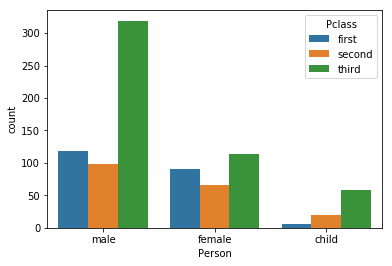

In [4]:
sns.countplot(x = "Person", data = titanic, hue = "Pclass", hue_order = ["first", "second", "third"])

Text(0.5, 1.0, 'Age Distribution')

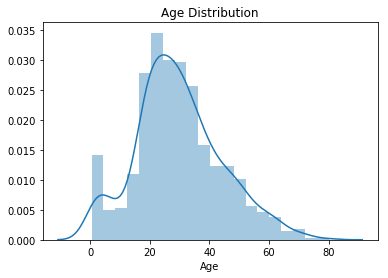

In [5]:
titanic_age = titanic['Age'].dropna()
sns.distplot(titanic_age).set_title("Age Distribution")

In [6]:
titanic_age.mean()

29.69911764705882

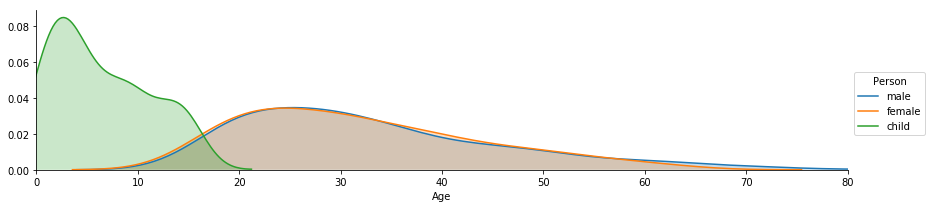

In [7]:
fig = sns.FacetGrid(titanic, hue = "Person", aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)
fig.set(xlim = [0, titanic['Age'].max()]).add_legend(frameon=True)

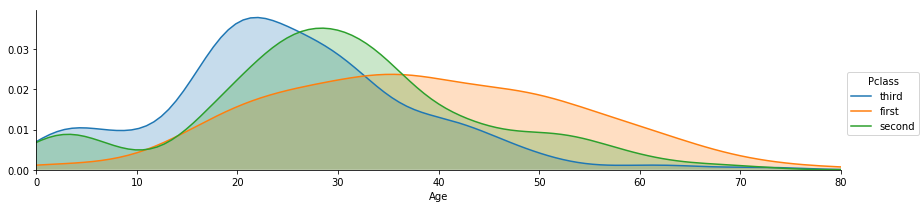

In [8]:
fig = sns.FacetGrid(titanic, hue = "Pclass", aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)
fig.set(xlim = [0, titanic['Age'].max()]).add_legend(frameon=True)

<h1>What deck were the passengers on and how does it relate to their class?</h1>

In [9]:
deck = titanic['Cabin'].dropna()

# the first letter deck is the cabin level 
levels = []
for level in deck:
    levels.append(level[0])
    
cabin = DataFrame(levels)
cabin.columns = ["Levels"]

# remove T cabin from data
cabin = cabin[cabin["Levels"] != 'T']    


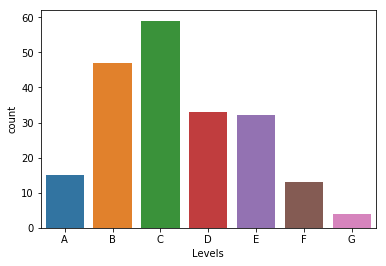

In [10]:
sns.countplot(x="Levels", data = cabin, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

<h1>Where did the passengers come from? </h1>

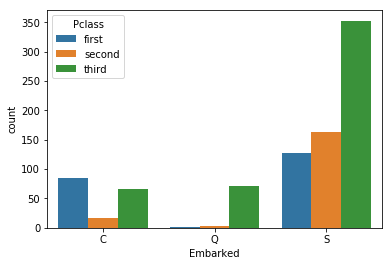

In [11]:
sns.countplot(x='Embarked',data = titanic,order =['C', 'Q', 'S'], hue = 'Pclass', hue_order = ['first','second','third'])

<h1>Who was alone and who was with family</h1>

In [12]:
# 'SibSp' means sibling or spouse
# 'Parch' means parent or children

Alone = []
for i in range(0, len(titanic['SibSp'])):
    if titanic['SibSp'][i] >= 1 or titanic['Parch'][i] >= 1:
        Alone.append("alone")
    else:
        Alone.append("with family")
        
titanic.insert(loc = len(titanic.columns), column = 'Alone', value = Alone)
        

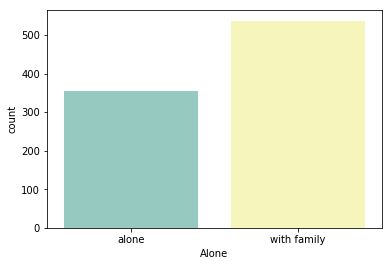

In [13]:
sns.countplot(x='Alone', data=titanic, palette='Set3')

<h1>What factor help someone survive the Titanic?</h1>

In [14]:
titanic['Status'] = titanic.Survived.map({1:'survived', 0:'dead'})

In [15]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Status
0,1,0,third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,alone,dead
1,2,1,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,alone,survived
2,3,1,third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,with family,survived
3,4,1,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,alone,survived
4,5,0,third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,with family,dead


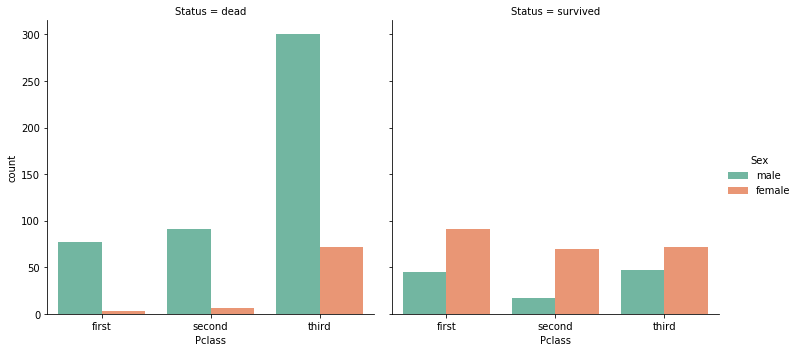

In [19]:
fig=sns.catplot(x="Pclass", hue="Sex", col="Status", order=['first','second','third'], data=titanic, kind="count", palette='Set2')
